In [1]:
import math
import rasterio
import matplotlib.pyplot as plt

In [2]:
import rasterio
import rasterio.features
import rasterio.warp

In [3]:
image_file ="../img_data/img1.img"
sat_data = rasterio.open(image_file)

In [4]:
width_in_projected_units = sat_data.bounds.right - sat_data.bounds.left
height_in_projected_units = sat_data.bounds.top - sat_data.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 91489.99999999997, Height: 82210.0


In [5]:
print("Rows: {}, Columns: {}".format(sat_data.height, sat_data.width))

Rows: 16442, Columns: 18298


In [6]:
# Upper left pixel
row_min = 0
col_min = 0

# Lower right pixel.  Rows and columns are zero indexing.
row_max = sat_data.height - 1
col_max = sat_data.width - 1

# Transform coordinates with the dataset's affine transformation.
topleft = sat_data.transform * (row_min, col_min)
botright = sat_data.transform * (row_max, col_max)

print("Top left corner coordinates: {}".format(topleft))
print("Bottom right corner coordinates: {}".format(botright))


Top left corner coordinates: (181008.94308370308, 1651742.5)
Bottom right corner coordinates: (263213.94308370305, 1560257.5)


In [7]:
print(sat_data.count)

# sequence of band indexes
print(sat_data.indexes)

3
(1, 2, 3)


In [8]:
# Load the 4 bands into 2d arrays 
#- recall that we previously learned PlanetScope band order is BGRN.
b, g, r = sat_data.read()

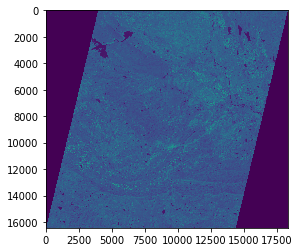

In [9]:
# Displaying the blue band.

fig = plt.imshow(b)
plt.show()

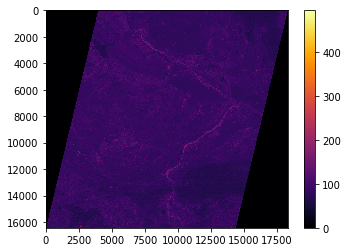

In [10]:
# Displaying the red band.

fig = plt.imshow(r)
fig.set_cmap('inferno')
plt.colorbar()
plt.show()


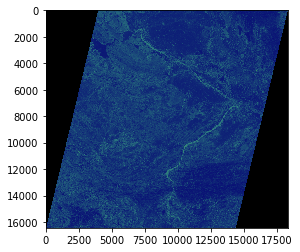

In [11]:
# Displaying the green band.

# Displaying the green band.

fig = plt.imshow(g)
fig.set_cmap('gist_earth')
plt.show()

In [12]:
sat_data.xy(0,0) 

(181011.44308370308, 1651740.0)

In [13]:
# Read the dataset's valid data mask as a ndarray.
mask = sat_data.dataset_mask()

# Extract feature shapes and values from the array.
for geom, val in rasterio.features.shapes(mask, transform=sat_data.transform):

# Transform shapes from the dataset's own coordinate
# reference system to CRS84 (EPSG:4326).
    geom = rasterio.warp.transform_geom(sat_data.crs, 'EPSG:4326', geom, precision=6)

# Print GeoJSON shapes to stdout.
    print(geom)

{'type': 'Polygon', 'coordinates': [[[78.035086, 14.92125], [78.044986, 14.178939], [78.892026, 14.187892], [78.884957, 14.930692], [78.035086, 14.92125]]]}
